**KRITHIKA M**

**Prediction using supervised ML**

Simple Linear regression task between a scalar variable and an explanatory variable to model the relationship between them.

In [1]:
#importing the data exploration python libraries to be used in this task:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline allows plots to appear and be saved in the notebook.
%matplotlib inline

In [2]:
#reading data files into pandas from the link.
dataurl="http://bit.ly/w-data"
datafile=pd.read_csv(dataurl)
print("Data has been imported.")

Data has been imported.


In [3]:
#using the head() method to display the first few(5) rows of the data imported.
datafile.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


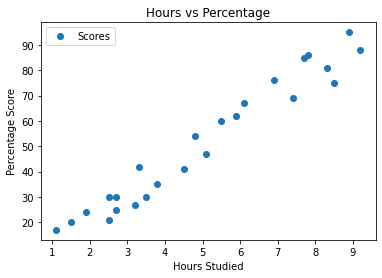

In [4]:
#a simple plot to see the relationship.
datafile.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

The above graph shows that there is a fairly strong positive linear relation between the number of hours studied and the the scores achieved.

**Preparing the data:**

Dividing data into data(inputs) and labels(outputs) using data selection python pandas method:** iloc**

In [5]:
#iloc[<row selector>,<column selector>]
x = datafile.iloc[:, :-1].values  #selecting all the rows and all columns except the last column
y = datafile.iloc[:, 1].values #selecting all rows and the second column.

**Splitting the data:**

Splitting the prepared data into test and train using the test_train_split utility from sklearn.model_selection.

**Train**: sample data used to train the model through which future predictions can be made.

**Test**: part of data that is unseen by the model, it is used to test how good the relationship and the prediction is made by the model.

In [6]:
#both the data and labels are needed to be split.
#0.25 is the default test size.
#random_state controls the shuffling.
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.25, random_state=0)  
 

**Training the model:**

The .fit() method is used to train the model.

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  #linear regression fits a linear model for least squares.
regressor.fit(x_train, y_train) #fit method takes the train attributes and the train labels.

print("Model is trained.")

Model is trained.


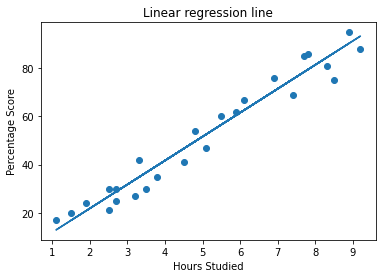

In [8]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.title('Linear regression line')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.plot(x, line);
plt.show()

**Testing the model:**

This allows to validate the model and compare how well the model performed in predicting.

In [9]:
print(x_test) 
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [10]:
#creating a dataframe to compare the actual and predicted values:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df


,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Predicting the score of a student who studies for 9.25 hours per day:**

In [11]:
hours = 9.25
own_pred = regressor.predict(np.array(hours).reshape(1,1))
print("The score predicted for 9.25 hours is = {}".format(own_pred[0]))

The score predicted for 9.25 hours is = 93.89272889341652


**Evaluating the model using regression metrics:**

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502482


In [13]:
from sklearn import metrics  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 20.33292367497996


In [14]:
from sklearn import metrics  
print('R-sqaured Error:', 
      metrics.r2_score(y_test, y_pred)) 

R-sqaured Error: 0.9367661043365056


**END OF TASK 1**